In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import kagglehub as kh

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [36]:
path = kh.dataset_download("mlg-ulb/creditcardfraud")

df= pd.read_csv(f"{path}/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.shape

(284807, 31)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
df.isnull().sum().sum()

np.int64(0)

In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [41]:
df.duplicated().sum()
len(df)

284807

In [42]:
df.drop_duplicates(inplace=True)
len(df)

283726

In [43]:
stats = df.describe()

print(stats.iloc[:,:12])


                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

In [44]:
print(stats.iloc[:,12:24])

                 V12            V13            V14            V15  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000715       0.000603       0.000252       0.001043   
std         0.994674       0.995430       0.952215       0.914894   
min       -18.683715      -5.791881     -19.214325      -4.498945   
25%        -0.406198      -0.647862      -0.425732      -0.581452   
50%         0.139072      -0.012927       0.050209       0.049299   
75%         0.616976       0.663178       0.492336       0.650104   
max         7.848392       7.126883      10.526766       8.877742   

                 V16            V17            V18            V19  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001162       0.000170       0.001515      -0.000264   
std         0.873696       0.842507       0.837378       0.813379   
min       -14.129855     -25.162799      -9.498746      -7.213527   
25%        -0.466860      -0.4839

In [45]:
print(stats.iloc[:,24:])

                 V24            V25            V26            V27  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000214      -0.000232       0.000149       0.001763   
std         0.605627       0.521220       0.482053       0.395744   
min        -2.836627     -10.295397      -2.604551     -22.565679   
25%        -0.354453      -0.317485      -0.326763      -0.070641   
50%         0.041016       0.016278      -0.052172       0.001479   
75%         0.439738       0.350667       0.240261       0.091208   
max         4.584549       7.519589       3.517346      31.612198   

                 V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  
mean        0.000547      88.472687       0.001667  
std         0.328027     250.399437       0.040796  
min       -15.430084       0.000000       0.000000  
25%        -0.052818       5.600000       0.000000  
50%         0.011288      22.000000       0.000000  
75%    

In [46]:
df['Class'].value_counts(normalize=True) *100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

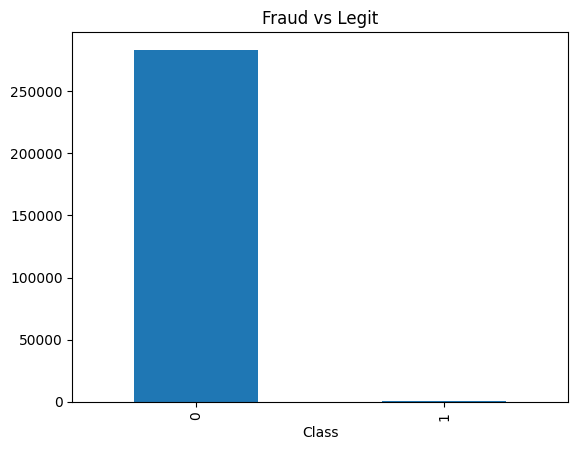

In [47]:
df['Class'].value_counts().plot(kind='bar', title='Fraud vs Legit')
plt.show()

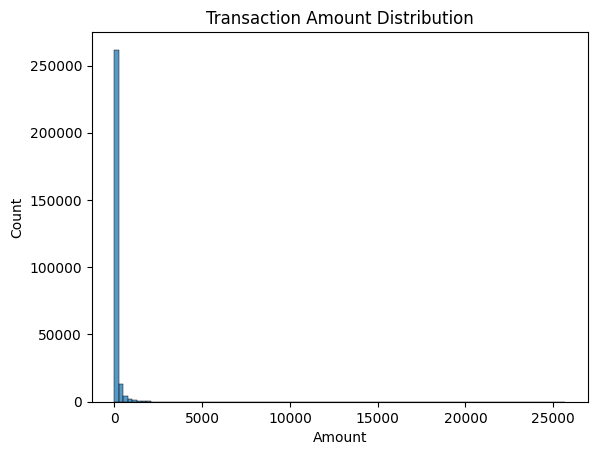

In [48]:
sns.histplot(df['Amount'], bins=100)
plt.title('Transaction Amount Distribution')
plt.show()

<Axes: xlabel='Hour', ylabel='count'>

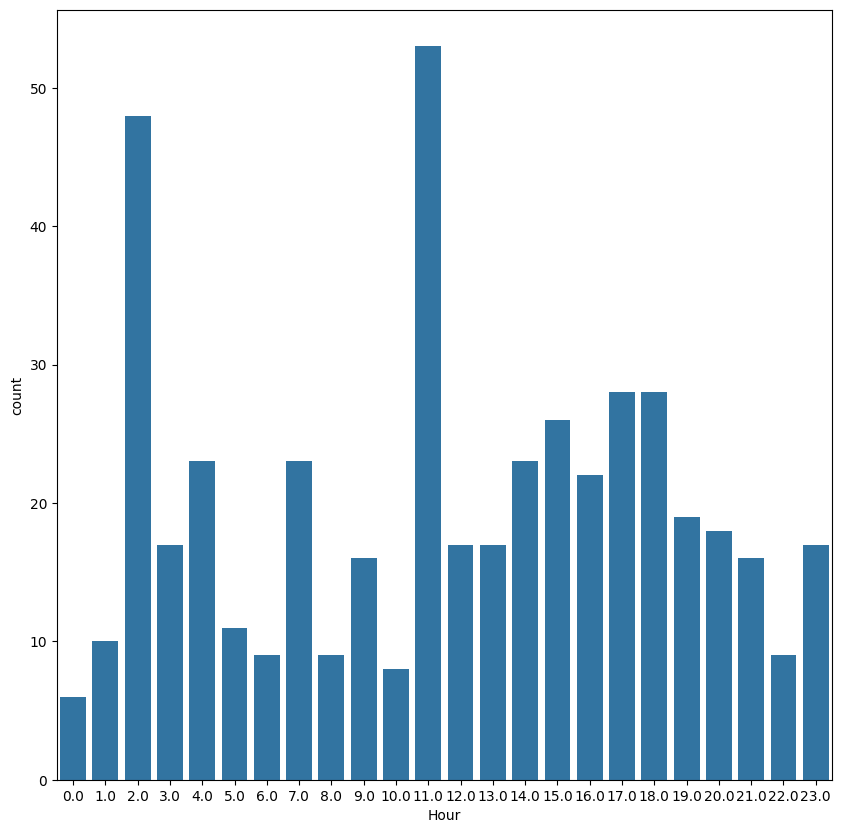

In [49]:
plt.figure(figsize=(10,10))
df['Hour'] = (df['Time'] // 3600) % 24
sns.countplot(x='Hour', data=df[df['Class'] == 1])

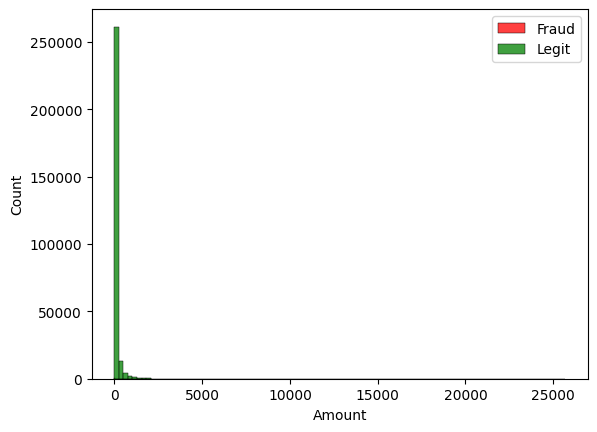

In [50]:
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

sns.histplot(fraud['Amount'], color='red', label='Fraud', bins=100)
sns.histplot(legit['Amount'], color='green', label='Legit', bins=100)
plt.legend()


Text(0.5, 1.0, 'Correlation Heatmap')

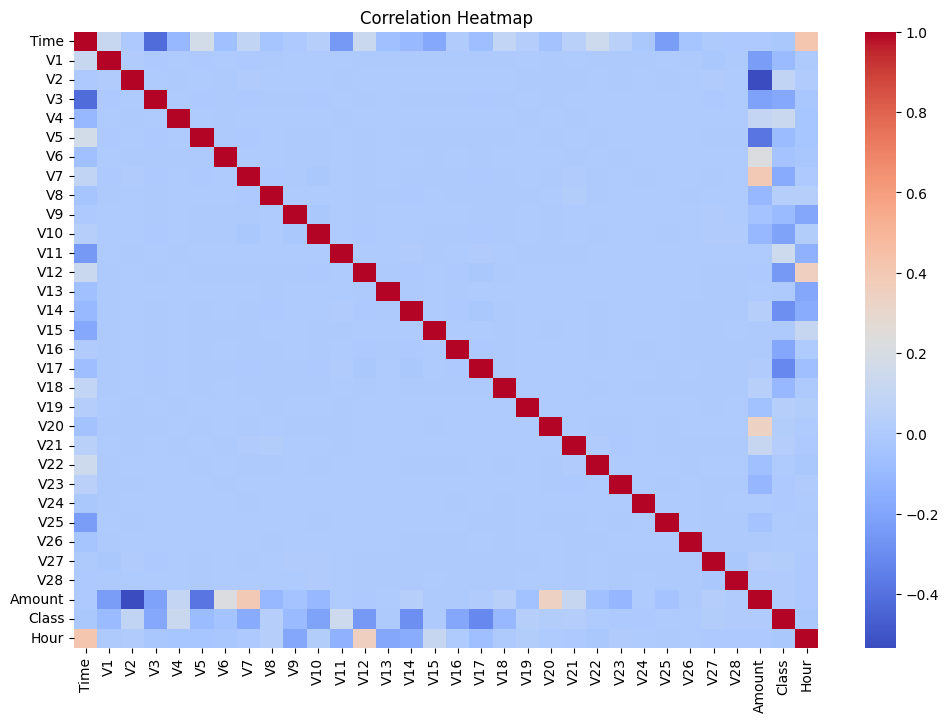

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")


In [52]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

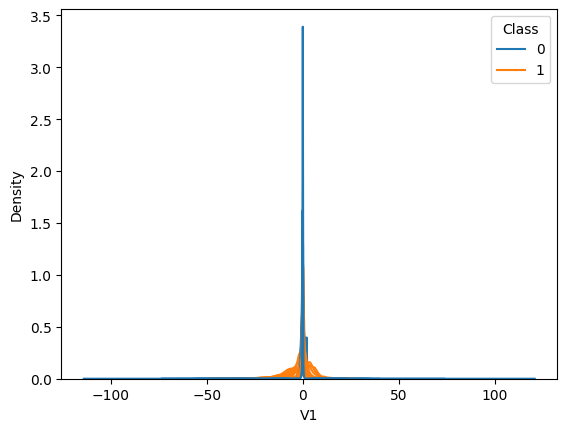

In [53]:
for col in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
    sns.kdeplot(data=df, x=col, hue='Class', common_norm=False)


In [54]:
from sklearn.utils import resample

# Separate classes
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

# Downsample majority
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine minority + downsampled majority
df_downsampled  = pd.concat([df_minority, df_majority_downsampled])

df_downsampled ["Class"].value_counts()

Class
1    473
0    473
Name: count, dtype: int64

In [55]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled["Class"].value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split first to avoid data leakage (ideal way)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


<Axes: title={'center': 'Training class balance after SMOTE'}, xlabel='Class'>

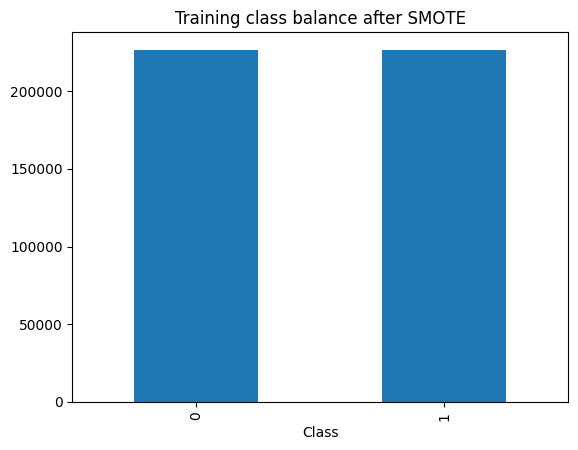

In [57]:
pd.Series(y_train_res).value_counts().plot(kind='bar', title='Training class balance after SMOTE')


In [58]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# rf.fit(X_train_res, y_train_res)


In [59]:
# importances = rf.feature_importances_
# feat_importances = pd.Series(importances, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.title("Top Fraud-Detecting Features")


In [60]:

# y_pred_rf = rf.predict(X_test)
# print("🌲 Random Forest Report:")
# print(confusion_matrix(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))


In [61]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Report:
[[56637    14]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.80      0.82        95

    accuracy                           1.00     56746
   macro avg       0.92      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [62]:
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train_res, y_train_res)

y_pred_cat = cat.predict(X_test)
print("CatBoost Report:")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


CatBoost Report:
[[56613    38]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.67      0.80      0.73        95

    accuracy                           1.00     56746
   macro avg       0.83      0.90      0.86     56746
weighted avg       1.00      1.00      1.00     56746



In [63]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Report:
[[56014   637]
 [   14    81]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.11      0.85      0.20        95

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.60     56746
weighted avg       1.00      0.99      0.99     56746



In [64]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('cat', cat),
        ('logreg',log_reg)
    ],
    voting='hard'  # 'hard' if you want majority vote of predicted classes
)

# 5. Fit & Predict
ensemble.fit(X_train_res, y_train_res)
y_pred = ensemble.predict(X_test)

# 6. Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56623    28]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.80      0.76        95

    accuracy                           1.00     56746
   macro avg       0.87      0.90      0.88     56746
weighted avg       1.00      1.00      1.00     56746



###  Model Evaluation Summary

We trained multiple classifiers on the **SMOTE-balanced dataset** and evaluated their performance using common classification metrics. Below is a detailed comparison:

---

####  Comparison Table

| Metric               |  XGBoost |  CatBoost |  Logistic Regression |  Voting Classifier |
|----------------------|------------|-------------|------------------------|----------------------|
| **TN (0→0)**         | 56,637     | 56,613      | 56,014                 | 56,623               |
| **FP (0→1)**         | 14         | 38          | **637** ⛔             | 28                   |
| **FN (1→0)**         | 19         | 19          | **14** ✅              | 19                   |
| **TP (1→1)**         | 76         | 76          | **81** ✅              | 76                   |
|                      |            |             |                        |                      |
| **Precision (Fraud)** | **0.84** ✅ | 0.67        | **0.11** ❌            | 0.73                 |
| **Recall (Fraud)**    | 0.80       | 0.80        | **0.85** ✅            | 0.80                 |
| **F1-Score (Fraud)**  | **0.82** ✅ | 0.73        | **0.20** ❌            | 0.76                 |
|                      |            |             |                        |                      |
| **Accuracy**         | 1.00       | 1.00        | 0.99                   | 1.00                 |
| **Macro Avg F1**     | **0.91** ✅ | 0.86        | **0.60** ❌            | 0.88                 |
| **Weighted Avg F1**  | 1.00       | 1.00        | 0.99                   | 1.00                 |

---

###  Final Verdict

After comparing all models, **XGBoost** outperformed the others on key metrics — especially on the minority fraud class (`Class 1`):

- **Best Precision (0.84)**: fewer false alarms.
- **Great Recall (0.80)**: detects 80% of actual frauds.
- **Highest F1-score (0.82)**: strongest fraud class balance.
- **Almost zero false positives/negatives** — like a fraud-sniffing ninja 

---

###  Why Choose XGBoost?

> **XGBoost** is the best all-rounder — it **balances caution (precision)** and **aggression (recall)** perfectly.  
It detects fraud **accurately and reliably**, while **minimizing false alarms**, making it ideal for real-world deployment .


In [ ]:
xgb.save_model("fraud_model.json")


In [66]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
